# COGS109 Final Project Notebook

In [140]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('diabetes.csv')
data

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-6ce98a907ecf>", line 1, in <module>
    data = pd.read_csv('diabetes.csv')
  File "/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 676, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 448, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 880, in __init__
    self._make_engine(self.engine)
  File "/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 1114, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/anaconda3/lib/python3.7/site-packages/pandas/io/parsers.py", line 1891, in __init__
    self._reader = parsers.TextReader(src, **kwds)
  File "

FileNotFoundError: [Errno 2] File diabetes.csv does not exist: 'diabetes.csv'

In [41]:
len(data)

768

In [35]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
diabetes_data_copy = data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


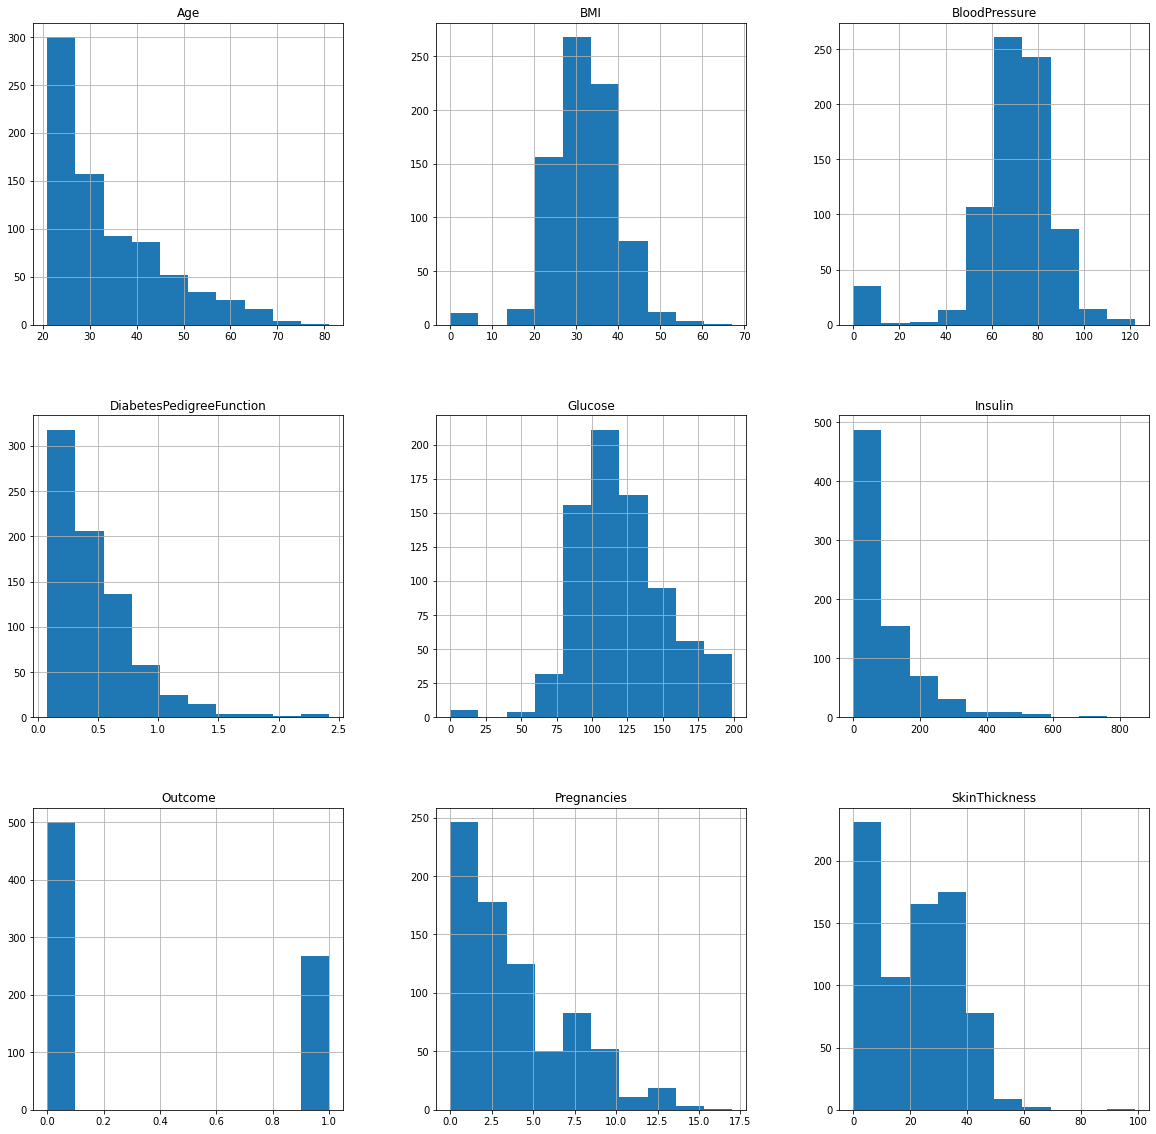

In [24]:
p = data.hist(figsize = (20,20))

In [25]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

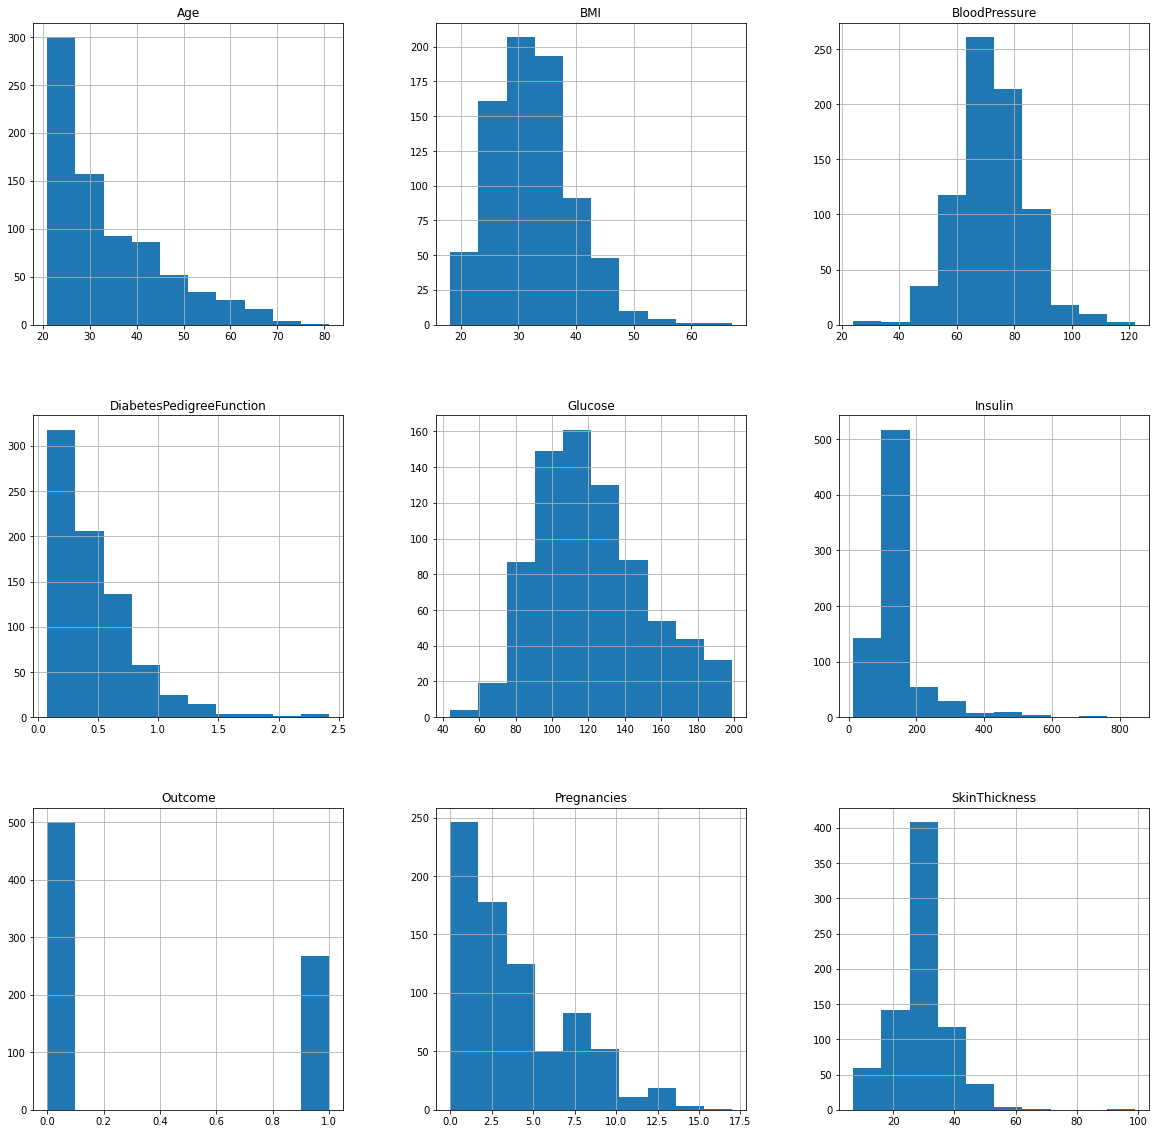

In [26]:
p = diabetes_data_copy.hist(figsize = (20,20))

In [102]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()



In [173]:
diabetes_data_copy = diabetes_data_copy.sample(frac=1, random_state=0).reset_index(drop=True)
X = diabetes_data_copy[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] 
X =  pd.DataFrame(sc_X.fit_transform(X,),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = diabetes_data_copy[['Outcome']]

X_test = X.loc[:230, :]
X_rest = X.loc[230:, :]
X_validation = X_rest.loc[231:391, :]
X_train = X_rest.loc[392:, :]

y_test = y.loc[:230, :]
y_rest = y.loc[230:, :]
y_validation = y_rest.loc[231:391, :]
y_train = y_rest.loc[392:, :]

In [131]:
X_validation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
231,0.342981,-0.581493,0.131929,-0.012301,-0.181541,-0.531999,-0.963044,1.255820
232,-0.250952,-0.482861,-0.860753,-1.833485,-1.073501,-1.390718,0.622518,-0.871374
233,0.046014,-1.239039,1.455504,-0.695245,-0.980830,1.025338,-0.944924,-0.701198
234,0.639947,0.240439,1.455504,-2.516429,2.146820,-1.871019,0.332587,2.276873
235,-0.547919,0.799353,0.297376,0.670643,0.617747,0.836129,-0.431503,-0.360847
...,...,...,...,...,...,...,...,...
387,0.342981,0.569212,-0.695306,0.670643,-0.007783,-0.561109,-0.183854,-0.616111
388,-0.547919,1.719918,1.290057,0.898290,-0.239461,1.753066,0.525874,-0.786286
389,-1.141852,1.917182,0.462823,3.857714,-1.467353,3.921696,5.883565,-0.701198
390,0.046014,0.799353,1.620951,-0.012301,-0.181541,-0.182690,0.202722,2.361961


In [132]:
y_validation

,Outcome
231,0
232,1
233,0
234,0
235,0
...,...
387,0
388,1
389,1
390,1


In [133]:
X_train.iloc[:, 0:1]

,Pregnancies
392,-0.547919
393,1.530847
394,0.342981
395,0.046014
396,1.827813
...,...
763,1.827813
764,0.639947
765,-1.141852
766,-0.844885


In [134]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
392,-0.547919,-1.765076,-8.607529e-01,-1.833485,-1.455769,-1.798246,-0.648952,-0.871374
393,1.530847,0.043176,-1.989652e-01,1.695058,-0.540642,0.093847,-0.295598,0.575118
394,0.342981,1.193881,9.591633e-01,1.353586,0.803089,1.010784,-0.232176,-0.360847
395,0.046014,-0.121211,-1.989652e-01,-0.012301,-0.181541,1.753066,1.305065,-0.616111
396,1.827813,0.240439,2.973756e-01,-0.126125,-0.216293,0.501374,-0.579489,0.490030
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,2.973756e-01,2.150354,0.455573,0.064737,-0.908682,2.532136
764,0.639947,-0.614370,-5.298590e-01,-0.012301,-0.181541,-1.186955,-0.673113,-0.360847
765,-1.141852,-0.154088,-5.298590e-01,0.215347,0.548244,-0.240908,0.063796,-0.956462
766,-0.844885,0.700722,9.591633e-01,-0.695245,1.961478,1.447421,1.824525,-0.956462


In [135]:
validation_scores = []
train_scores = []
test_scores = []
for i in range(len(X.columns)):
    
    train_X = pd.DataFrame(X_train.iloc[:, 0:i+1])
    validation_X = pd.DataFrame(X_validation.iloc[:, 0:i+1])
    test_X = pd.DataFrame(X_test.iloc[:, 0:i+1])
    knn = KNeighborsClassifier(10)
    knn.fit(train_X,y_train)


    train_scores.append(knn.score(train_X, y_train))
    validation_scores.append(knn.score(validation_X,y_validation))
    test_scores.append(knn.score(test_X,y_test))
    print(1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

1
1
1
1
1
1
1
1


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [136]:
train_scores

[0.6888297872340425,
 0.7686170212765957,
 0.776595744680851,
 0.776595744680851,
 0.776595744680851,
 0.7659574468085106,
 0.7579787234042553,
 0.7978723404255319]

In [137]:
validation_scores

[0.639751552795031,
 0.7639751552795031,
 0.7639751552795031,
 0.7453416149068323,
 0.7142857142857143,
 0.7577639751552795,
 0.7515527950310559,
 0.7515527950310559]

In [138]:
test_scores

[0.6493506493506493,
 0.7012987012987013,
 0.696969696969697,
 0.6883116883116883,
 0.6666666666666666,
 0.7056277056277056,
 0.70995670995671,
 0.6796536796536796]

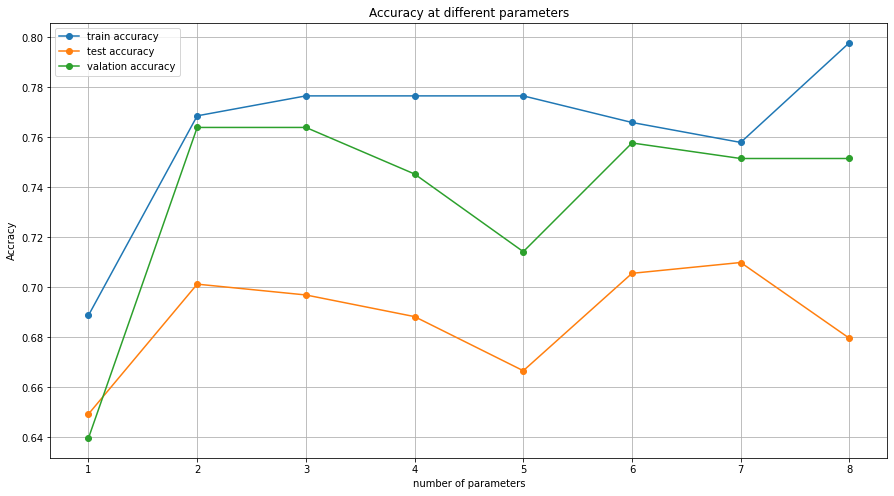

In [154]:
plt.figure(figsize=(15,8))
x = np.arange(1,9)
plt.plot(x,train_scores,'-o',label ='train accuracy')
plt.plot(x,test_scores,'-o',label = 'test accuracy')
plt.plot(x,validation_scores,'-o',label = 'valation accuracy')
plt.title('Accuracy at different parameters')
plt.xlabel('number of parameters')
plt.ylabel('Accracy')
plt.legend()
plt.grid()

In [157]:
validation_scores = []
train_scores = []
test_scores = []
for i in range(len(X.columns)):
    train_X = X_train.drop(columns = X_train.columns[i])
    validation_X = X_validation.drop(columns = X_validation.columns[i])
    test_X = X_test.drop(columns = X_test.columns[i])
    knn = KNeighborsClassifier(10)
    knn.fit(train_X,y_train)


    train_scores.append(knn.score(train_X, y_train))
    validation_scores.append(knn.score(validation_X,y_validation))
    test_scores.append(knn.score(test_X,y_test))


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/ana

In [159]:
train_scores

[0.8138297872340425,
 0.7367021276595744,
 0.7898936170212766,
 0.7952127659574468,
 0.776595744680851,
 0.8111702127659575,
 0.7952127659574468,
 0.7579787234042553]

In [160]:
validation_scores

[0.782608695652174,
 0.6708074534161491,
 0.7888198757763976,
 0.7639751552795031,
 0.8012422360248447,
 0.7763975155279503,
 0.7204968944099379,
 0.7515527950310559]

In [161]:
test_scores

[0.7142857142857143,
 0.6623376623376623,
 0.670995670995671,
 0.70995670995671,
 0.683982683982684,
 0.683982683982684,
 0.70995670995671,
 0.70995670995671]

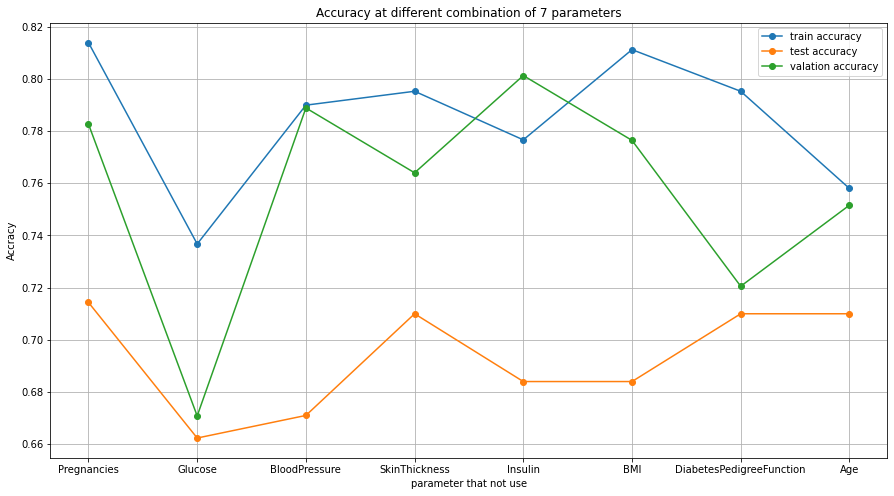

In [168]:
plt.figure(figsize=(15,8))
x = X_train.columns
plt.plot(x,train_scores,'-o',label ='train accuracy')
plt.plot(x,test_scores,'-o',label = 'test accuracy')
plt.plot(x,validation_scores,'-o',label = 'valation accuracy')
plt.title('Accuracy at different combination of 7 parameters')
plt.xlabel('parameter that not use')
plt.ylabel('Accracy')
plt.legend()
plt.grid()

In [174]:
X_final = X.drop(columns = 'Pregnancies')
X_final

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.449984,-0.695306,-0.012301,-0.181541,-0.240908,-0.947944,-1.041549
1,-0.745879,0.297376,-1.605837,-1.038749,-1.347055,-0.751636,-1.041549
2,-0.581493,-0.695306,-0.695245,-0.285796,-0.677545,-0.053989,-0.871374
3,1.095249,0.959163,1.695058,4.683692,0.908902,0.444331,0.064591
4,0.832231,0.131929,-0.467597,1.764552,0.355829,-0.262377,-0.275760
...,...,...,...,...,...,...,...
763,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.548616,0.959163,-0.012301,-0.181541,-0.662990,0.812786,2.447048
765,1.193881,1.455504,-0.012301,-0.181541,-0.124472,1.006073,2.787399
766,0.897985,-0.364412,-0.012301,-0.158373,-0.459227,-0.371101,0.745293


In [175]:
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_final,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

Best Score:0.7890586537645362
Best Parameters: {'n_neighbors': 24}


In [176]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7890586537645362
Best Parameters: {'n_neighbors': 24}


In [177]:
validation_scores = []
train_scores = []
test_scores = []

for i in range(500):
    diabetes_data_copy = diabetes_data_copy.sample(frac=1, random_state=0).reset_index(drop=True)
    X = diabetes_data_copy[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age']] 
    X =  pd.DataFrame(sc_X.fit_transform(X,),
            columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age'])
    y = diabetes_data_copy[['Outcome']]

    X_test = X.loc[:230, :]
    X_rest = X.loc[230:, :]
    X_validation = X_rest.loc[231:391, :]
    X_train = X_rest.loc[392:, :]

    y_test = y.loc[:230, :]
    y_rest = y.loc[230:, :]
    y_validation = y_rest.loc[231:391, :]
    y_train = y_rest.loc[392:, :]
    
    
    train_X = X_train.drop(columns = X_train.columns[0])
    validation_X = X_validation.drop(columns = X_validation.columns[0])
    test_X = X_test.drop(columns = X_test.columns[0])
    knn = KNeighborsClassifier(24)
    knn.fit(train_X,y_train)


    train_scores.append(knn.score(train_X, y_train))
    validation_scores.append(knn.score(validation_X,y_validation))
    test_scores.append(knn.score(test_X,y_test))
    
    
    
    


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed

[0.7978723404255319,
 0.7925531914893617,
 0.776595744680851,
 0.8111702127659575,
 0.7872340425531915,
 0.7659574468085106,
 0.776595744680851,
 0.7845744680851063,
 0.7792553191489362,
 0.8058510638297872,
 0.7872340425531915,
 0.8031914893617021,
 0.800531914893617,
 0.7898936170212766,
 0.8111702127659575,
 0.7686170212765957,
 0.8031914893617021,
 0.7819148936170213,
 0.7819148936170213,
 0.7819148936170213,
 0.7526595744680851,
 0.7898936170212766,
 0.7925531914893617,
 0.7632978723404256,
 0.800531914893617,
 0.800531914893617,
 0.7978723404255319,
 0.7712765957446809,
 0.8085106382978723,
 0.7872340425531915,
 0.7686170212765957,
 0.800531914893617,
 0.7872340425531915,
 0.7952127659574468,
 0.776595744680851,
 0.773936170212766,
 0.8058510638297872,
 0.7712765957446809,
 0.7819148936170213,
 0.8031914893617021,
 0.776595744680851,
 0.7792553191489362,
 0.8164893617021277,
 0.7925531914893617,
 0.7952127659574468,
 0.7872340425531915,
 0.8085106382978723,
 0.7712765957446809,
 

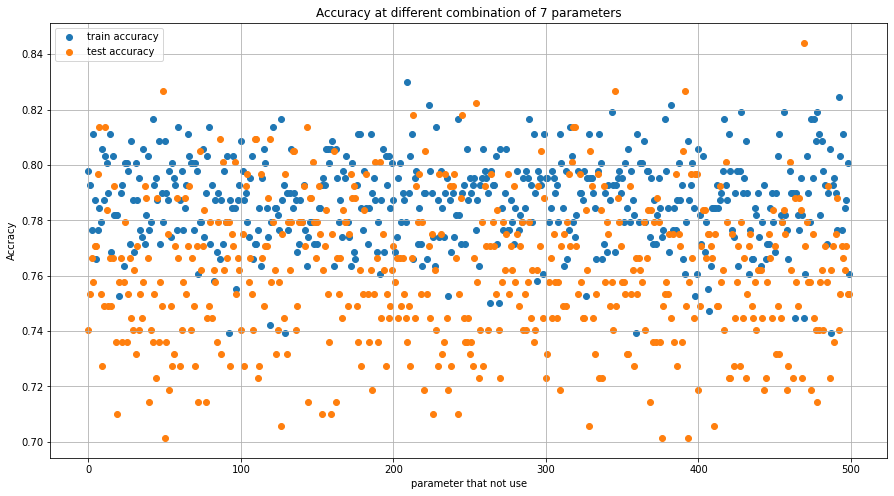

In [182]:
plt.figure(figsize=(15,8))
x = np.arange(0,500)
plt.scatter(x,train_scores,label ='train accuracy')
plt.scatter(x,test_scores,label = 'test accuracy')
# plt.scatter(x,validation_scores,label = 'valation accuracy')
plt.title('Accuracy at different combination of 7 parameters')
plt.xlabel('parameter that not use')
plt.ylabel('Accracy')
plt.legend()
plt.grid()